In [1]:
# 데이터 읽어오기
import pandas as pd

df = pd.read_csv('data/dataset.csv')
df.shape

(3712, 6)

In [2]:
df.head()

,date,avgTemp,minTemp,maxTemp,rainfall,price
0,2010-01-01,-4.9,-11.0,0.9,0.0,2123.0
1,2010-01-02,-0.1,-5.5,5.5,0.8,2123.0
2,2010-01-03,-2.9,-6.9,1.4,0.0,2123.0
3,2010-01-04,-1.8,-5.1,2.2,5.9,2123.0
4,2010-01-05,-5.2,-8.7,-1.8,0.7,2209.0


In [3]:
# 데이터 세트 분리하기(train, test)
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
X.shape

(3712, 4)

In [4]:
X.head()

,avgTemp,minTemp,maxTemp,rainfall
0,-4.9,-11.0,0.9,0.0
1,-0.1,-5.5,5.5,0.8
2,-2.9,-6.9,1.4,0.0
3,-1.8,-5.1,2.2,5.9
4,-5.2,-8.7,-1.8,0.7


In [5]:
y = df.iloc[:, [-1]]
y.shape

(3712, 1)

In [6]:
y.head()

,price
0,2123.0
1,2123.0
2,2123.0
3,2123.0
4,2209.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2784, 4), (928, 4), (2784, 1), (928, 1))

In [26]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std[:1], X_test_std[:1]

(array([[-0.67632516, -0.55741019, -0.76167606, -0.29206993]]),
 array([[ 1.63296538,  1.61502065,  1.63022962, -0.38207189]]))

In [27]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# 예측
y_predicted = mlr.predict(X_test_std)
y_predicted[:1]

array([[3524.36840404]])

In [33]:
# 정확도 측정
# R2 - 결정계수(R-Square, Coefficient of Determination)
mlr.score(X_test_std, y_test)

0.019801198362431438

In [34]:
# 각 속성들(평균기온, 최고기온, 최저기온, 강수량)과의 상관관계
mlr.coef_

array([[-877.51477652,  322.05953253,  692.73367753,   95.45996438]])

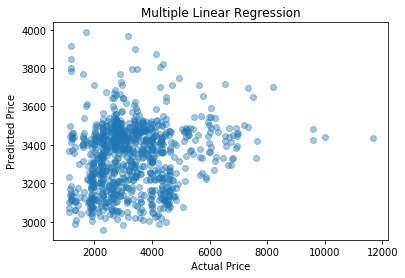

In [35]:
# 실제 가격과 예측된 가격 비교 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression')
plt.show()

In [36]:
# 모델 저장
import pickle

with open('model/predict_cabbage_price.model', 'wb') as f:
    pickle.dump(sc, f)
    pickle.dump(mlr, f)